# Вычислительная математика. Лабораторная работа №1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x_sym = sp.Symbol('x')

# Функции

Тут представлены данные в лабораторной работе функции

In [7]:
f1_sym = sp.sin(x_sym**2)

f2_sym = sp.cos(sp.sin(x_sym))

f3_sym = sp.exp(sp.sin(sp.cos(x_sym)))

f4_sym = sp.ln(x_sym + 3)

f5_sym = (x_sym + 3)**0.5


Рассчитаем их производные. Я хочу сделать это автоматически, поэтому воспользуюсь библиотекой SymPy

In [8]:
df1_analytic_sym = sp.diff(f1_sym, x_sym)

df2_analytic_sym = sp.diff(f2_sym, x_sym)

df3_analytic_sym = sp.diff(f3_sym, x_sym)

df4_analytic_sym = sp.diff(f4_sym, x_sym)

df5_analytic_sym = sp.diff(f5_sym, x_sym)

Взглянем на вычисленные производные

In [16]:
display(df1_analytic_sym)

display(df2_analytic_sym)

display(df3_analytic_sym)

display(df4_analytic_sym)

display(df5_analytic_sym)


2*x*cos(x**2)

-sin(sin(x))*cos(x)

-exp(sin(cos(x)))*sin(x)*cos(cos(x))

1/(x + 3)

0.5/(x + 3)**0.5

Преобразуем полученные функции, в понятный для NumPy вид c помощью sp.lambdify

In [17]:
f1 = sp.lambdify(x_sym, f1_sym, "numpy")
df1_analytic = sp.lambdify(x_sym, df1_analytic_sym, "numpy")

f2 = sp.lambdify(x_sym, f2_sym, "numpy")
df2_analytic = sp.lambdify(x_sym, df2_analytic_sym, "numpy")

f3 = sp.lambdify(x_sym, f3_sym, "numpy")
df3_analytic = sp.lambdify(x_sym, df3_analytic_sym, "numpy")

f4 = sp.lambdify(x_sym, f4_sym, "numpy")
df4_analytic = sp.lambdify(x_sym, df4_analytic_sym, "numpy")

f5 = sp.lambdify(x_sym, f5_sym, "numpy")
df5_analytic = sp.lambdify(x_sym, df5_analytic_sym, "numpy")

## Методы численного дифференцирования

Определим методы, заданные условием

In [18]:
def method1(f, x, h):
    return (f(x + h) - f(x)) / h

def method2(f, x, h):
    return (f(x) - f(x - h)) / h

def method3(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def method4(f, x, h):
    return (4/3 * (f(x + h) - f(x - h)) / (2 * h) - 1/3 * (f(x + 2*h) - f(x - 2*h)) / (4 * h))

def method5(f, x, h):
    return (3/2 * (f(x + h) - f(x - h)) / (2 * h) - 3/5 * (f(x + 2*h) - f(x - 2*h)) / (4 * h) + 
            1/10 * (f(x + 3*h) - f(x - 3*h)) / (6 * h))

## Вычисление и отрисовка

Напишем функцию, которая будет просчитывать абсолютные ошибки и строить графики

In [34]:
def calculate_errors_and_plot(f, df_analytic, x, h_values, function_name):
    methods = [method1, method2, method3, method4, method5]
    method_formulas = [
        r"$f'(x)=\frac{f(x+h) - f(x)}{h}$", 
        r"$f'(x)=\frac{f(x) - f(x-h)}{h}$", 
        r"$f'(x)=\frac{f(x+h) - f(x-h)}{2h}$", 
        r"$f'(x)=\frac{4}{3} \frac{f(x+h) - f(x-h)}{2h} - \frac{1}{3} \frac{f(x+2h) - f(x-2h)}{4h}$", 
        r"$f'(x)=\frac{3}{2} \frac{f(x+h) - f(x-h)}{2h} - \frac{3}{5} \frac{f(x+2h) - f(x-2h)}{4h} + \frac{1}{10} \frac{f(x+3h) - f(x-3h)}{6h}$"
    ]
    
    plt.figure(figsize=(10, 6))
    for i, method in enumerate(methods):
        errors = []
        for h in h_values:
            df_numeric = method(f, x, h)
            df_exact = df_analytic(x)
            error = np.abs(df_numeric - df_exact)
            errors.append(error)
        
        plt.loglog(h_values, errors, label=method_formulas[i])

    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    plt.title(f'Error comparison for {function_name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, fancybox=True, shadow=True)
    plt.grid(True, which="both", ls="--")
    plt.show()

## Графики

Зададим значение точки, в которой будем вычислять производную, а также значения h

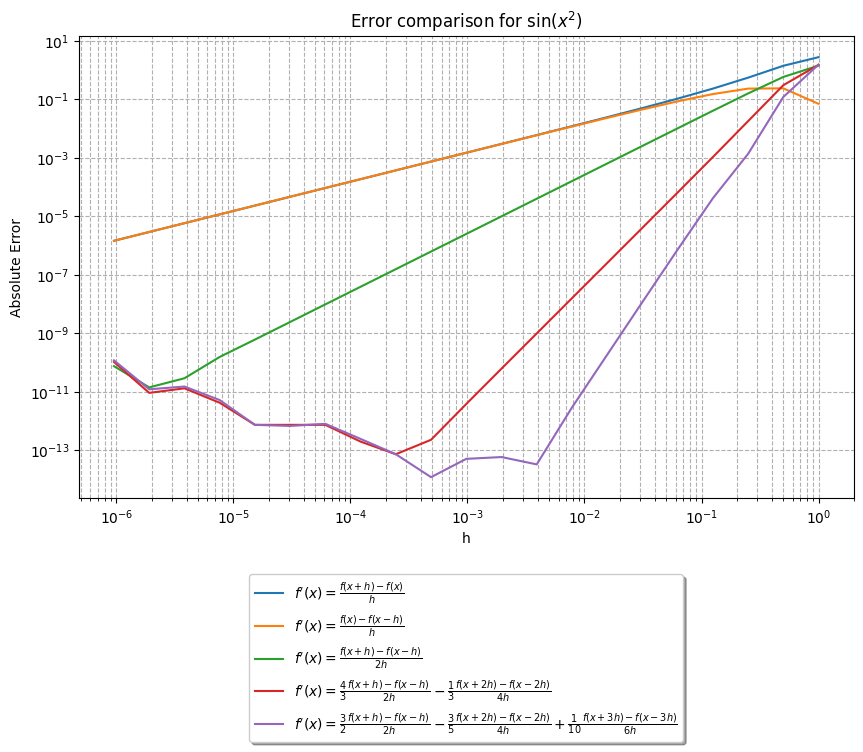

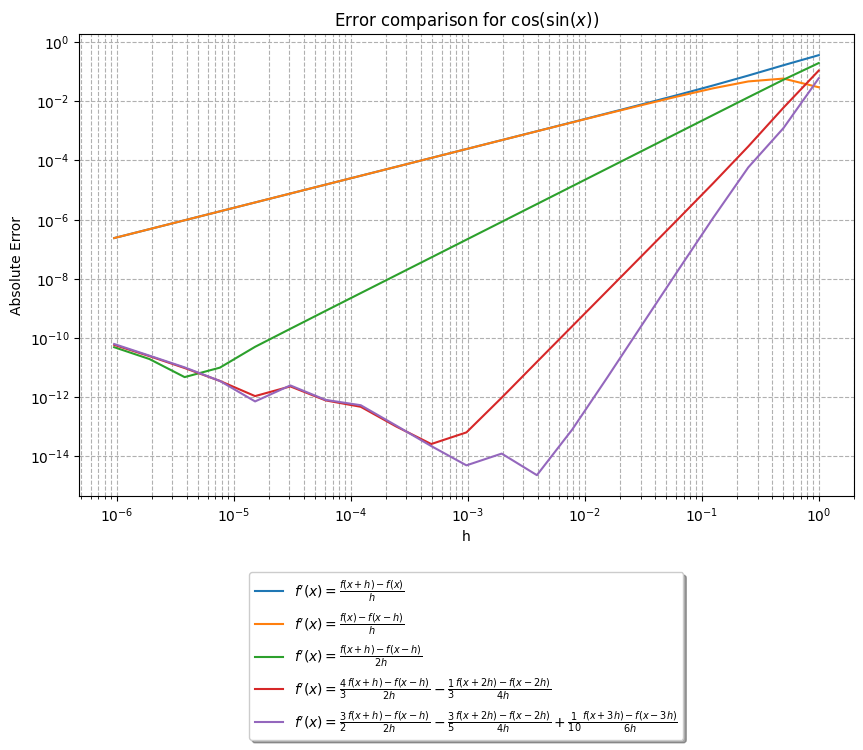

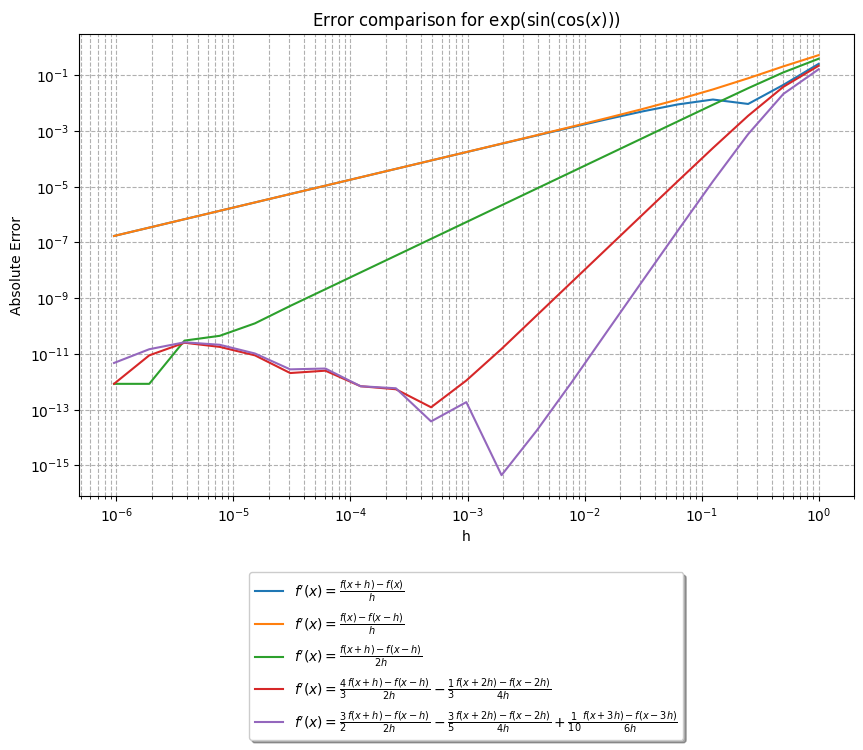

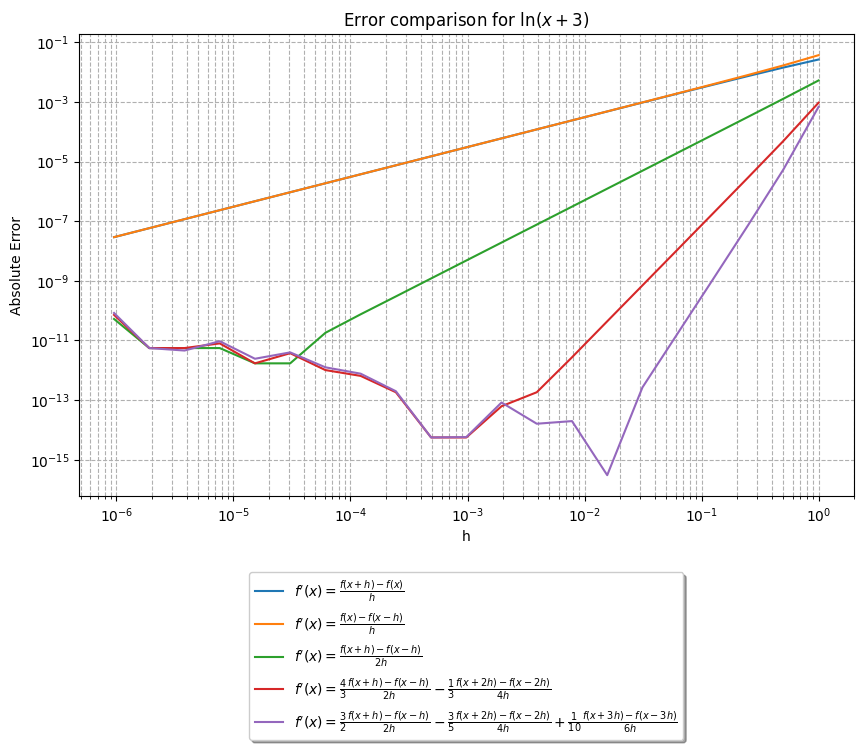

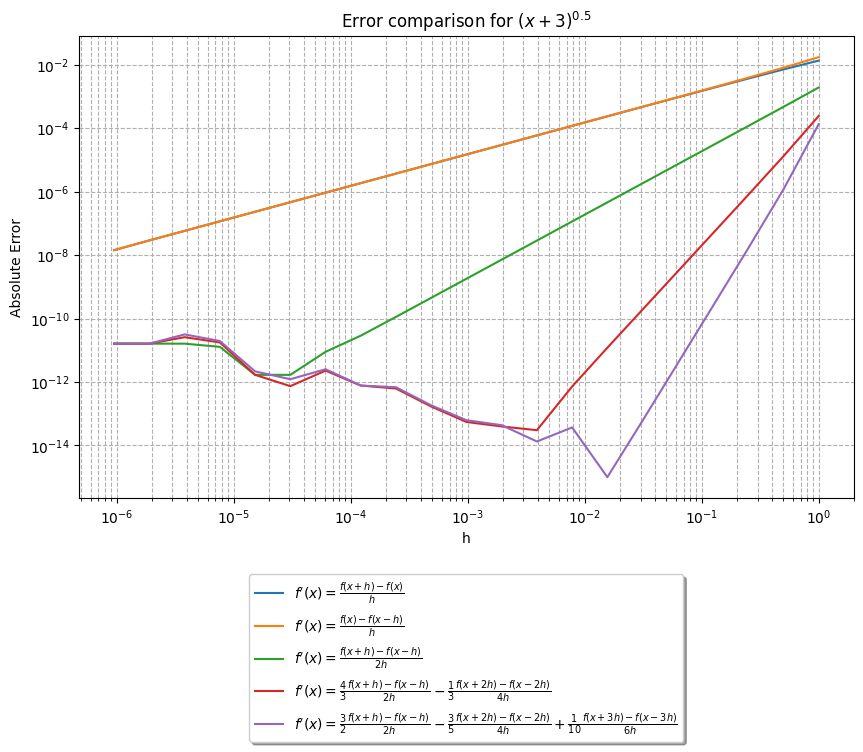

In [40]:
x = np.pi / 3

n_values = np.arange(1, 22)
h_values = 2 / (2 ** n_values)

calculate_errors_and_plot(f1, df1_analytic, x, h_values, function_name=r"$\sin(x^2)$")
calculate_errors_and_plot(f2, df2_analytic, x, h_values, function_name=r"$\cos(\sin(x))$")
calculate_errors_and_plot(f3, df3_analytic, x, h_values, function_name=r"$\exp(\sin(\cos(x)))$")
calculate_errors_and_plot(f4, df4_analytic, x, h_values, function_name=r"$\ln(x+3)$")
calculate_errors_and_plot(f5, df5_analytic, x, h_values, function_name=r"$(x+3)^{0.5}$")

## Вывод

Последний метод оказался самым точным, он позволяет добиться наименьшей абсолютной погрешности. У последних трех графиков чет.ка виден минимум погрешности. Значение $h$ при котором это наблюдается и является оптимальным шагом $h_{opt}$. Методы 1 и 2 аналогичны